## Data Preparation

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Dataset/aug_train.csv')
test = pd.read_csv('Dataset/aug_test.csv')
submission = pd.read_csv('Dataset/sample_submission.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [6]:
df['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [7]:
(df.isnull().sum()  / len(df) * 100).sort_values(ascending=False)

company_type              32.049274
company_size              30.994885
gender                    23.530640
major_discipline          14.683161
education_level            2.401086
last_new_job               2.207955
enrolled_university        2.014824
experience                 0.339284
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
target                     0.000000
dtype: float64

In [8]:
df['target'] = df['target'].astype('str')

<Axes: >

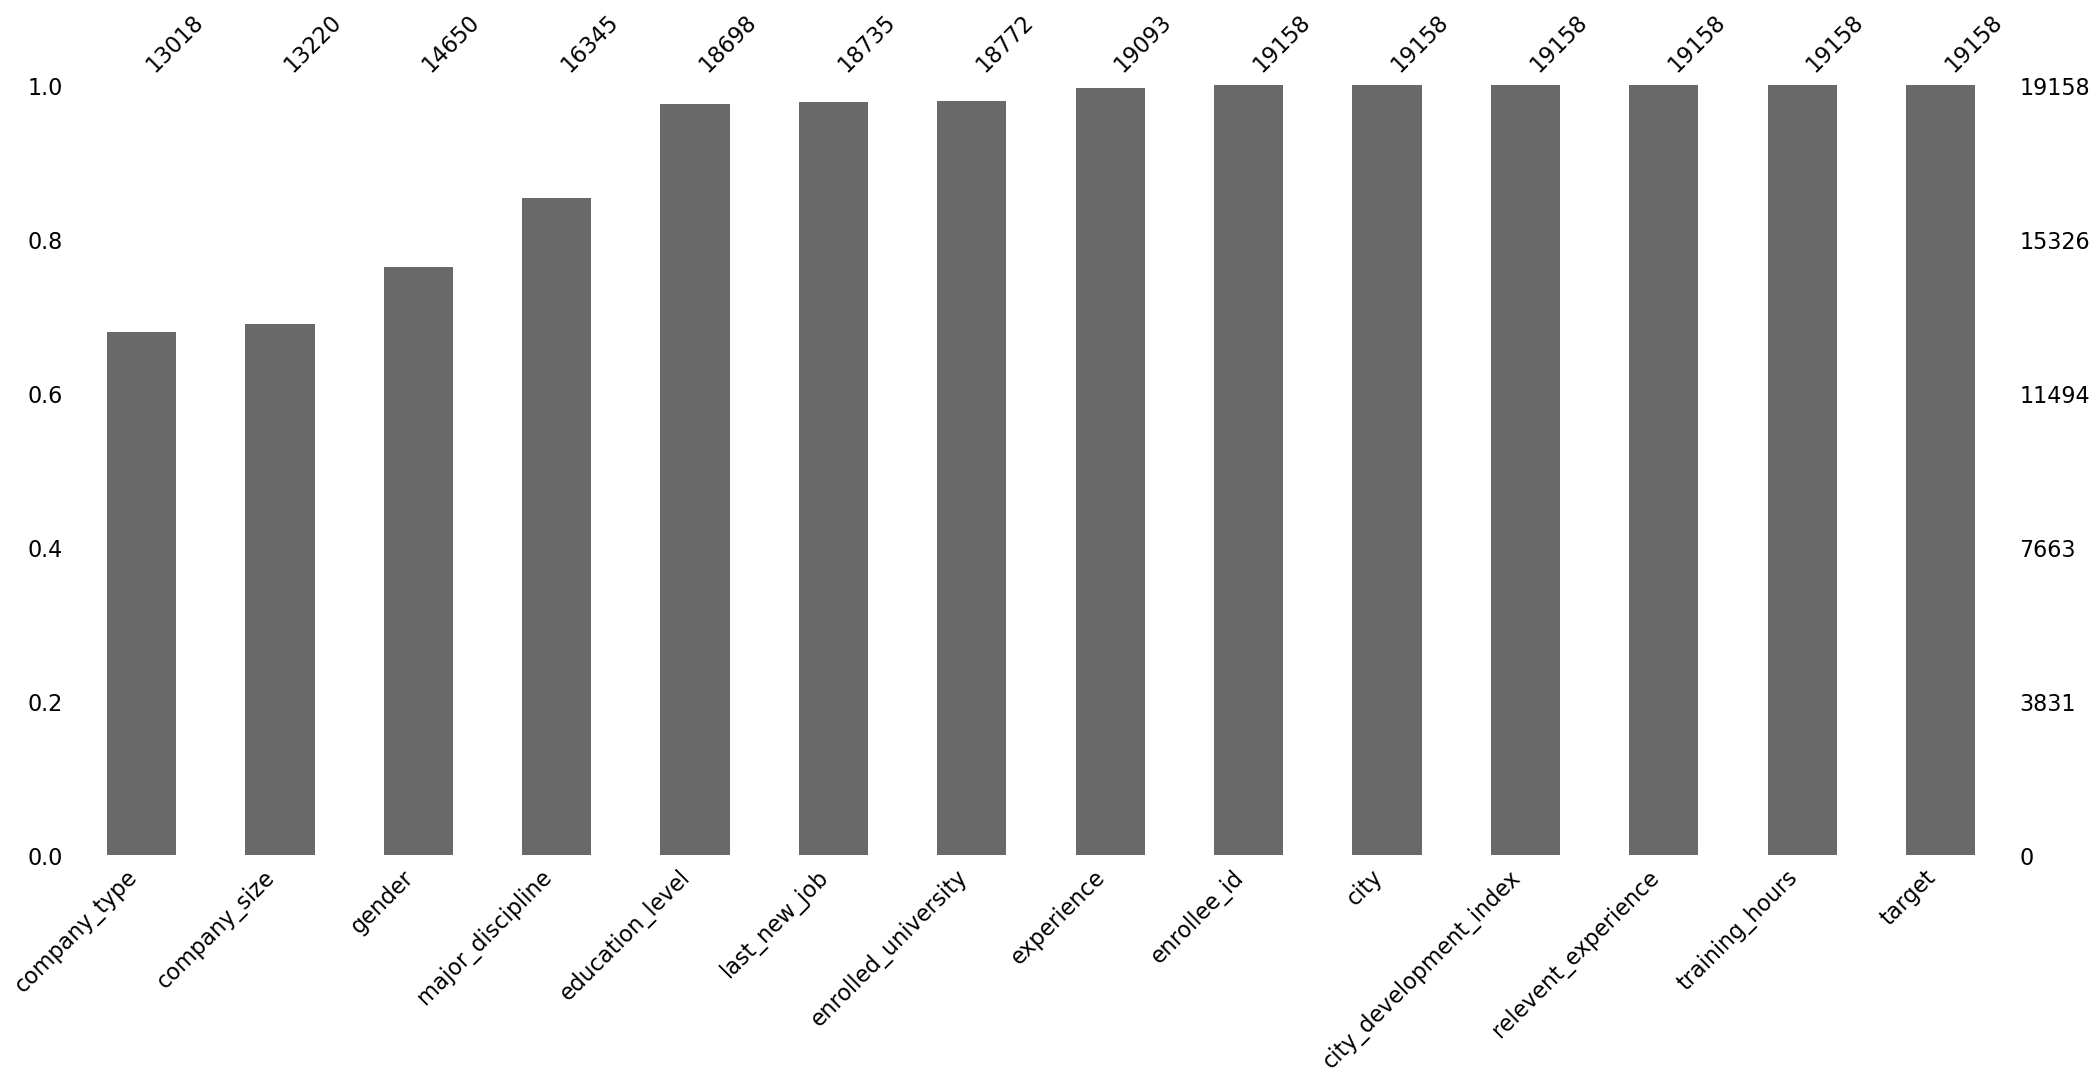

In [9]:
msno.bar(df, sort="ascending")

In [10]:
df.select_dtypes(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,1.0
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,0.0
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,0.0
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,1.0
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,1.0
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,1.0
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,0.0
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,0.0


In [11]:
df.select_dtypes(include='object').nunique()

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
target                   2
dtype: int64

In [12]:
(df.select_dtypes(include='object').isna().sum()  / len(df)) * 100

city                    0.000000
gender                 23.530640
relevent_experience     0.000000
enrolled_university     2.014824
education_level         2.401086
major_discipline       14.683161
experience              0.339284
company_size           30.994885
company_type           32.049274
last_new_job            2.207955
target                  0.000000
dtype: float64

## Predicting Employee Promotions

## EDA

In [13]:
df['target'].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

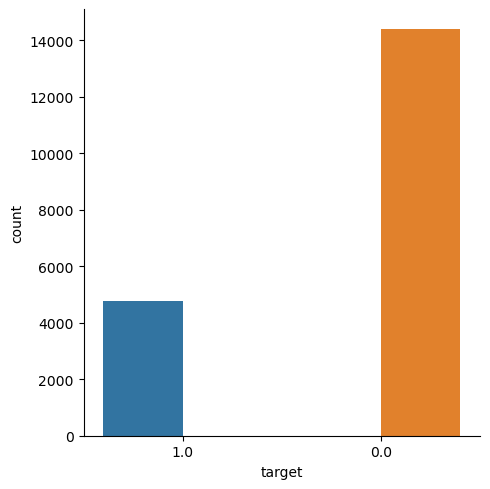

In [14]:
# Explore Target distribution
sns.catplot(x="target", kind="count", hue='target', data=df);

# Data Analysis

## Categorical analysis

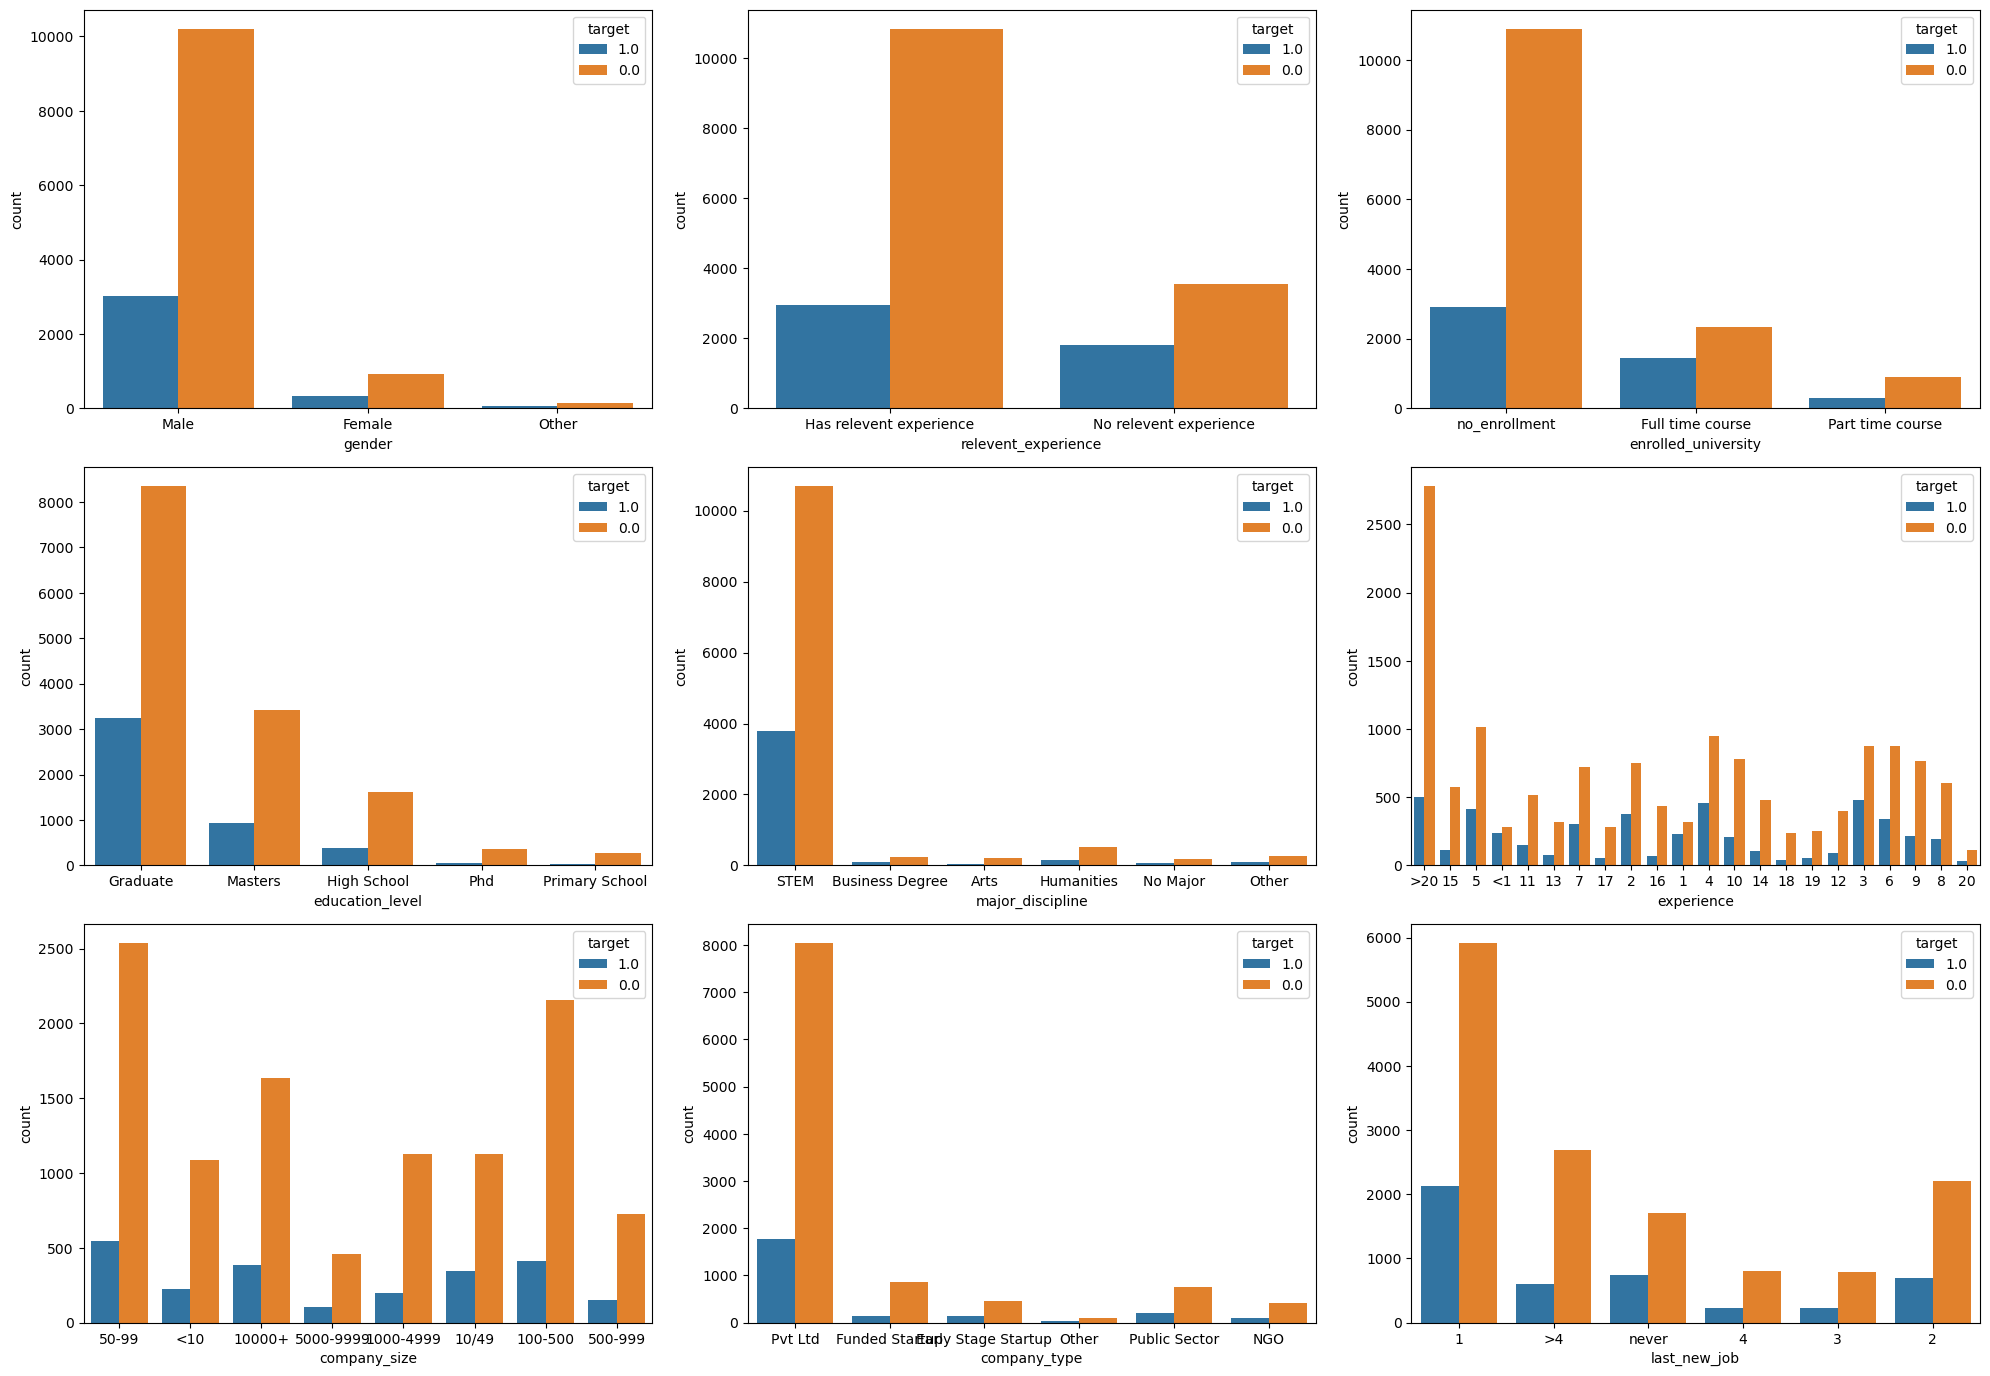

In [15]:
cat_feat=df.drop(['city','target'],axis=1).select_dtypes("object").columns

plt.figure(figsize=(20,18))
for i in range(len(cat_feat)):
    plt.subplot(4,3,i+1)
    sns.countplot(x=cat_feat[i],data=df,hue='target')
plt.tight_layout()
plt.show()

# Preprocessing

In [16]:
def preprocessing_data(df, target_col=None, threshold=0.80):

    # drop unwanted columns
    df = df.drop(['enrollee_id'], axis=1)

    # Convert column names to strings and replace invalid characters
    # df.columns = df.columns.astype(str).str.replace('[\[\]\<]', '_', regex=True)

    # One Hot Encoding conversion for columns with more unique values
    df = pd.get_dummies(df, prefix_sep="_", columns=['gender',
                                                      'relevent_experience',
                                                      'enrolled_university',
                                                      'education_level',
                                                      'major_discipline',
                                                      'company_size',
                                                      'company_type',
                                                      'last_new_job'])

    # Label Encoder conversion for columns with less unique values
    le = LabelEncoder()
    columns = ['city','experience']
    df[columns] = df[columns].apply(lambda col: le.fit_transform(col))

    # Impute missing values in object columns with mode
    object_cols = df.select_dtypes(include=['object']).columns
    df[object_cols] = df[object_cols].apply(lambda x: x.fillna(x.mode()[0]))

    # Drop columns that are highly correlated
    corr = df.corr(numeric_only=True).abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    tri_df = corr.mask(mask)
    to_drop = [c for c in tri_df.columns if any(tri_df[c] > threshold)]
    df = df.drop(to_drop, axis=1)

    # Scale our data into the range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[df.columns.difference([target_col])] = scaler.fit_transform(df[df.columns.difference([target_col])])

    return df

In [17]:
processed_train = preprocessing_data(df, 'Target')
processed_test = preprocessing_data(test)

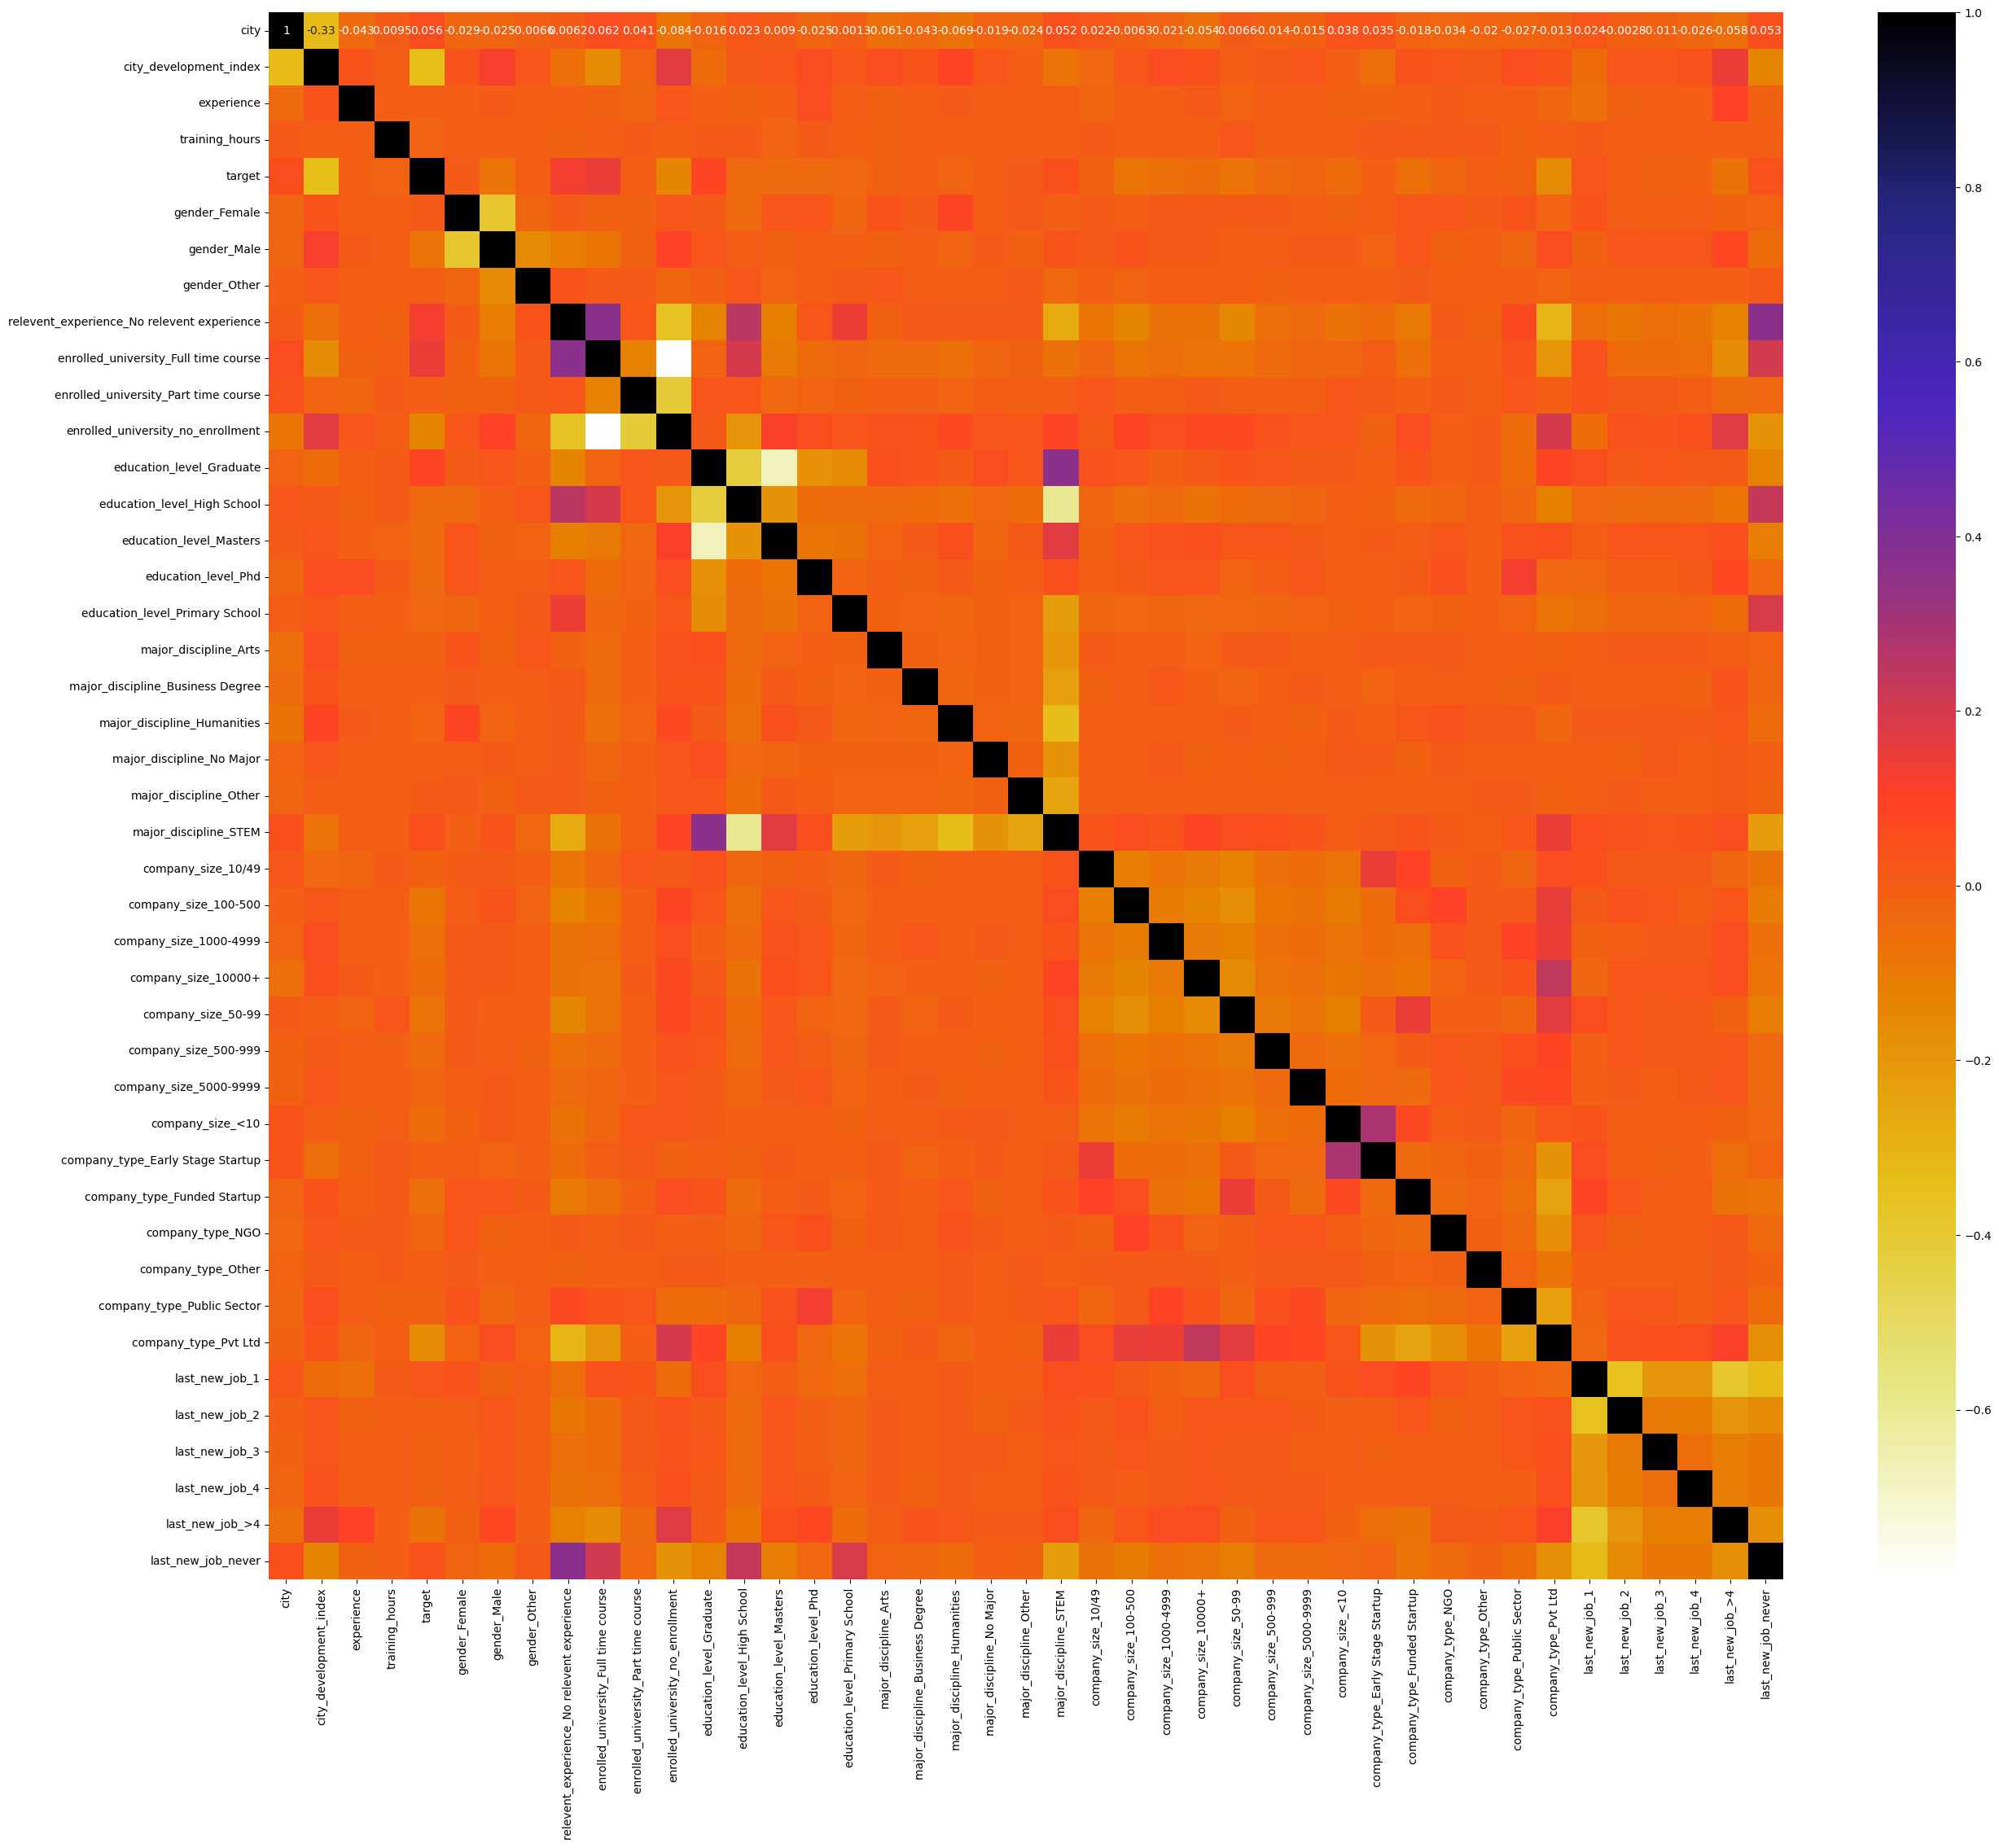

In [18]:
plt.figure(figsize = (30, 25))
sns.heatmap(processed_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Feature Importance

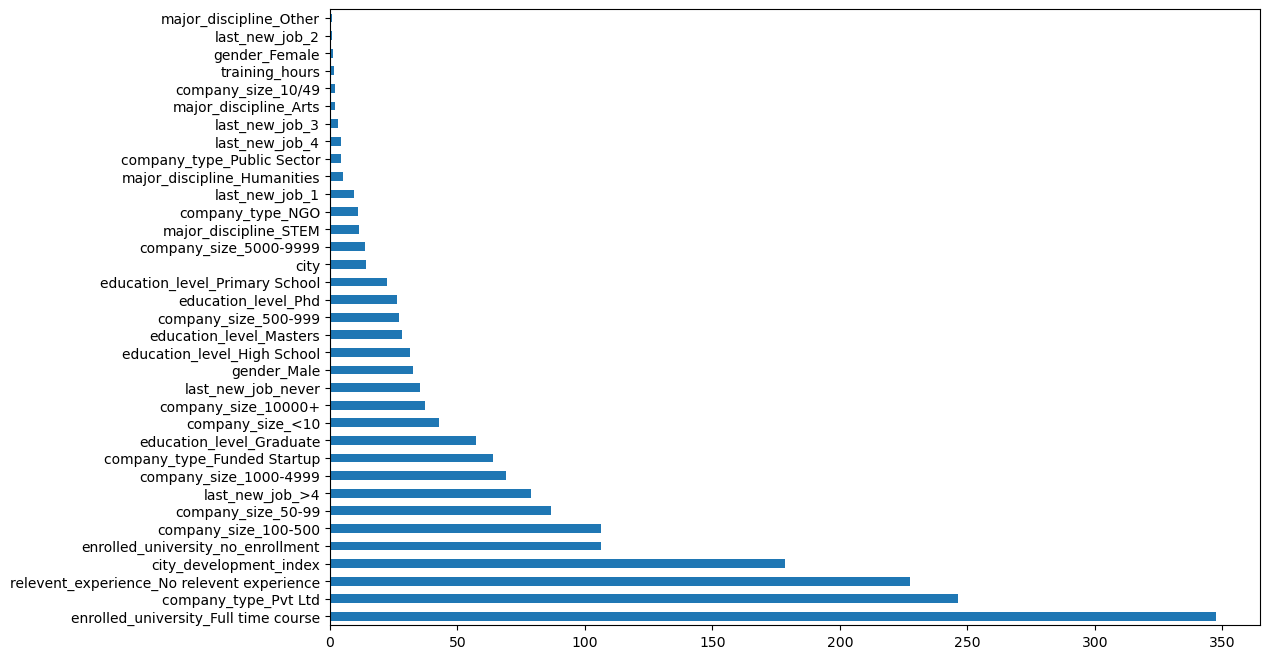

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = processed_train.drop(['target'], axis=1)
y = processed_train['target']

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)

plt.figure(figsize=(12, 8))
model = pd.Series(fit.scores_, index=X.columns)
model.nlargest(35).plot(kind='barh')
plt.show()

In [20]:
importance_df = pd.DataFrame(model.nlargest(50), columns=['Importance']).reset_index()
importance_df.head()

,index,Importance
0,enrolled_university_Full time course,347.314270
1,company_type_Pvt Ltd,246.380826
2,relevent_experience_No relevent experience,227.490477
3,city_development_index,178.361200
4,enrolled_university_no_enrollment,106.265920


# Model Development


# Samping technique - SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply SMOTE only to the training data
x_train, y_train = smote.fit_resample(x_train, y_train)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=1, criterion='entropy'),
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'XGBoost': xgb.XGBClassifier(random_state=1)
}

# List to store model metrics
models_metrics = []

# Evaluate each model
for name, model in models.items():

    # # Convert column names to strings and replace invalid characters
    x_train.columns = x_train.columns.astype(str).str.replace('[\[\]\<]', '_', regex=True)
    x_test.columns = x_test.columns.astype(str).str.replace('[\[\]\<]', '_', regex=True)

    # Fit the model on the resampled training set
    model.fit(x_train_smote, y_train_smote)

    # Predict on the test data (unbalanced original test set)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate the metrics
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    auc = round(roc_auc_score(y_test, y_pred_proba), 4) if y_pred_proba is not None else 'N/A'

    # Append the metrics to the list
    models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    })

# Convert the results into a DataFrame for better visualization
metrics_df = pd.DataFrame(models_metrics)

NameError: name 'x_train_smote' is not defined

In [23]:
# Evaluate each model
for name, model in models.items():

    # Convert column names to strings and replace invalid characters with a single underscore
    x_train.columns = x_train.columns.astype(str).str.replace('[\[\]\<]+', '_', regex=True)
    x_test.columns = x_test.columns.astype(str).str.replace('[\[\]\<]+', '_', regex=True)

    # Fit the model on the resampled training set
    model.fit(x_train, y_train) # Changed from x_train_smote and y_train_smote

    # Predict on the test data (unbalanced original test set)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate the metrics
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    auc = round(roc_auc_score(y_test, y_pred_proba), 4) if y_pred_proba is not None else 'N/A'

    # Append the metrics to the list
    models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    })

# Convert the results into a DataFrame for better visualization
metrics_df = pd.DataFrame(models_metrics)

NameError: name 'models' is not defined

In [ ]:
metrics_df

## xgboost

In [ ]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier()

xg_cl.fit(x_train, y_train)
preds = xg_cl.predict(x_test)
accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
print("accuracy: %f" % (accuracy))
print("F1 Score: %f" % f1)
print(classification_report(y_test, preds))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return sensitivity, specificity, accuracy

# Define a range of cutoff thresholds
cutoff_values = np.linspace(0, 1, 100)

# Initialize lists to store sensitivity, specificity, and accuracy for each cutoff
sensitivities = []
specificities = []
accuracies = []

# Calculate metrics for each cutoff threshold
for cutoff in cutoff_values:
    preds = (xg_cl.predict_proba(x_test)[:, 1] > cutoff).astype(int)
    sensitivity, specificity, accuracy = calculate_metrics(y_test, preds)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(cutoff_values, sensitivities, label='Sensitivity')
plt.plot(cutoff_values, specificities, label='Specificity')
plt.plot(cutoff_values, accuracies, label='Accuracy')
plt.xlabel('Cutoff Threshold')
plt.ylabel('Metric Value')
plt.title('Cutoff Threshold vs Sensitivity, Specificity, and Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Get predicted probabilities for positive class
probs_positive_class = xg_cl.predict_proba(x_test)[:, 1]

# Apply cutoff threshold of 0.23
preds = (probs_positive_class > 0.23).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, preds)

# Calculate F1 score
f1 = f1_score(y_test, preds)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

In [ ]:
importance_df.head()

In [ ]:
# Assuming you have a model with feature importances
features = processed_train.columns.drop('target')  # Drop target column from features
importances = xg_cl.feature_importances_  # For tree-based models
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
importance_df.head()

# Actionable Insights and Recommendations

**Feature Importance Insights:**

1. Company Type (Funded Startup)

Employees in funded startups may experience faster career growth due to high-paced, dynamic environments, or perhaps these companies have more structured or transparent promotion paths. HR teams at funded startups may want to review and formalize these pathways to ensure fairness and consistency.

2. Company Type (Pvt Ltd)

Employees in Pvt Ltd companies may receive promotions based on company-specific policies, growth trajectories, or available internal mobility. HR teams in such companies should analyze existing promotion policies to ensure they are clear and accessible to employees.

3. City Development Index – Importance: 0.0750

Employees in more developed cities might have better access to professional development opportunities, better job networks, or more competitive environments that push for quicker promotions. HR departments should consider how location affects employee career growth and create equal opportunities for employees in less developed areas through remote work options or regional development programs.

4. Company Type (NGO)

NGOs may have different promotion structures compared to corporate environments, possibly tied to the nature of funding or organizational structure. HR teams in NGOs might need to develop clear promotion pathways to attract and retain talent.

5. Company Type (Early Stage Startup)

Early-stage startups may offer more rapid promotions due to smaller team sizes and the need for leadership as the company grows. However, the uncertainty or lack of formalized processes may also cause uneven promotion opportunities. HR in these startups should focus on establishing scalable promotion policies as the company grows.

### Recommendations for HR Teams:



1. Tailor Promotion Policies: Depending on the company type, HR departments should tailor promotion strategies. For instance, startups may need more flexible, fast-tracked promotions, while established companies might focus on fairness and transparency.

2. Equalize Opportunities Across Locations: Employees in less developed cities may face disadvantages compared to those in developed cities. Offering equal access to learning and development opportunities or remote work could bridge this gap.

3. Sector-Specific Strategies: NGOs and early-stage startups often have different growth dynamics compared to corporate environments. HR teams in these sectors should develop promotion strategies that align with their organizational culture and financial structure.

# Prediction

In [ ]:
# Replace '<' with '_' in the column names of processed_test
processed_test.columns = [col.replace("<", "_") for col in processed_test.columns]

# Get predicted probabilities for positive class on processed_test data
probs_positive_class_test = xg_cl.predict_proba(processed_test)[:, 1]

# Apply cutoff threshold of 0.23
test['Target'] = (probs_positive_class_test > 0.23).astype(int)

In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"enrollee_id": test["enrollee_id"],
                           "Target": test['Target']})
submission.head()
# submission.to_csv('submission_xg', index=False)